In [1]:
import numpy as np
import pandas as pd

# agg()

In [7]:
# - It is used to perform the aggregations

# df.agg(function,axis)

In [5]:
df=pd.DataFrame({'A':[10,20,30,40,50],
             'B':[2,4,6,8,10]})
df

,A,B
0,10,2
1,20,4
2,30,6
3,40,8
4,50,10


In [9]:
df.agg('sum')

A    150
B     30
dtype: int64

In [14]:
df.agg(['sum','max','min','std','mean']).T

,sum,max,min,std,mean
A,150.0,50.0,10.0,15.811388,30.0
B,30.0,10.0,2.0,3.162278,6.0


In [17]:
df.agg({'A':'max','B':'sum'})

A    50
B    30
dtype: int64

In [20]:
df.agg({'A':['sum','mean'],'B':['min','max']}).fillna(0)

,A,B
sum,150.0,0.0
mean,30.0,0.0
min,0.0,2.0
max,0.0,10.0


# Concatenation of dataframes

In [21]:
# - Vertical concatenation (axis=0)- Columns should be the same
# - Horizontal concatenation (axis=1) Rows should be equal

In [27]:
# pd.concat((df1,df2),axis=0/1)

In [25]:
d1=pd.DataFrame({'Name':['Priyanka','Nikhil','Shreya'],
             'Age':[24,26,28],
             'City':['Pune','Mumbai','Bangalore']})
d1

,Name,Age,City
0,Priyanka,24,Pune
1,Nikhil,26,Mumbai
2,Shreya,28,Bangalore


In [26]:
d2=pd.DataFrame({'Company':['TCS','Infosys','Wipro'],
                'ID':[111,112,113]})
d2

,Company,ID
0,TCS,111
1,Infosys,112
2,Wipro,113


In [29]:
pd.concat((d1,d2),axis=1)

,Name,Age,City,Company,ID
0,Priyanka,24,Pune,TCS,111
1,Nikhil,26,Mumbai,Infosys,112
2,Shreya,28,Bangalore,Wipro,113


In [30]:
d1

,Name,Age,City
0,Priyanka,24,Pune
1,Nikhil,26,Mumbai
2,Shreya,28,Bangalore


In [31]:
d2

,Company,ID
0,TCS,111
1,Infosys,112
2,Wipro,113


In [33]:
d3=pd.DataFrame({'Name':['Ambika','Priti'],'Age':[25,26],'City':['Chennai','Madurai']})
d3

,Name,Age,City
0,Ambika,25,Chennai
1,Priti,26,Madurai


In [34]:
d1

,Name,Age,City
0,Priyanka,24,Pune
1,Nikhil,26,Mumbai
2,Shreya,28,Bangalore


In [36]:
pd.concat((d1,d3),ignore_index=True)

,Name,Age,City
0,Priyanka,24,Pune
1,Nikhil,26,Mumbai
2,Shreya,28,Bangalore
3,Ambika,25,Chennai
4,Priti,26,Madurai


# Merging of dataframes

In [38]:
# - To merge two dataframes atleast 1 common column should be there.

# - pd.merge(df_1,df_2,on=common_col,how=)

In [41]:
emp=pd.read_csv(r"C:\Users\ashis\OneDrive\Desktop\Data Science\Batches\Practice Datasets\emp.csv")
emp

,Name,Designation,Code,City,Depart_No
0,Akanksha,Data Scientist,101,Noida,10
1,Dinesh,Analyst,101,Mumbai,10
2,Gyan,Data Engineer,103,Delhi,20
3,Sakina,Developer,104,Pune,30
4,Puneet,Marketing Analyst,105,Bangalore,10
5,Haritha,Councellor,106,Chennai,20
6,Mahesh,Project Manager,107,Gurugram,50
7,Akshata,Business Analyst,108,Bangalore,30


In [43]:
dp=pd.read_csv(r"C:\Users\ashis\OneDrive\Desktop\Data Science\Batches\Practice Datasets\dept.csv")
dp

,Depart_No,Department,City
0,10,Data,Delhi
1,20,HR,Gurugram
2,30,Operations,Bangalore
3,40,Marketing,Pune


In [45]:
# on=Common column
# how=inner
# - It will take the coomon observations on the basis of the common column from both the dataframes

# emp= 10,20,30,50
# dp= 10,20,30,40

# inner= 10,20,30

In [46]:
pd.merge(emp,dp,on='Depart_No',how='inner')

,Name,Designation,Code,City_x,Depart_No,Department,City_y
0,Akanksha,Data Scientist,101,Noida,10,Data,Delhi
1,Dinesh,Analyst,101,Mumbai,10,Data,Delhi
2,Puneet,Marketing Analyst,105,Bangalore,10,Data,Delhi
3,Gyan,Data Engineer,103,Delhi,20,HR,Gurugram
4,Haritha,Councellor,106,Chennai,20,HR,Gurugram
5,Sakina,Developer,104,Pune,30,Operations,Bangalore
6,Akshata,Business Analyst,108,Bangalore,30,Operations,Bangalore


In [49]:
# how='left'

# It keeps all the observations for the common column from the left dataframe

# emp=10,20,30,50
# dp=10,20,30,40

# left=10,20,30,50

In [50]:
pd.merge(emp,dp,on='Depart_No',how='left')

,Name,Designation,Code,City_x,Depart_No,Department,City_y
0,Akanksha,Data Scientist,101,Noida,10,Data,Delhi
1,Dinesh,Analyst,101,Mumbai,10,Data,Delhi
2,Gyan,Data Engineer,103,Delhi,20,HR,Gurugram
3,Sakina,Developer,104,Pune,30,Operations,Bangalore
4,Puneet,Marketing Analyst,105,Bangalore,10,Data,Delhi
5,Haritha,Councellor,106,Chennai,20,HR,Gurugram
6,Mahesh,Project Manager,107,Gurugram,50,NaN,NaN
7,Akshata,Business Analyst,108,Bangalore,30,Operations,Bangalore


In [51]:
# how='right'

# It keeps all the observations for the common column from the right dataframe

# emp=10,20,30,50
# dp=10,20,30,40

# right=10,20,30,40

In [52]:
pd.merge(emp,dp,on='Depart_No',how='right')

,Name,Designation,Code,City_x,Depart_No,Department,City_y
0,Akanksha,Data Scientist,101.0,Noida,10,Data,Delhi
1,Dinesh,Analyst,101.0,Mumbai,10,Data,Delhi
2,Puneet,Marketing Analyst,105.0,Bangalore,10,Data,Delhi
3,Gyan,Data Engineer,103.0,Delhi,20,HR,Gurugram
4,Haritha,Councellor,106.0,Chennai,20,HR,Gurugram
5,Sakina,Developer,104.0,Pune,30,Operations,Bangalore
6,Akshata,Business Analyst,108.0,Bangalore,30,Operations,Bangalore
7,NaN,NaN,NaN,NaN,40,Marketing,Pune


In [53]:
# how='outer'

# It keeps all the observations for the common column from both the dataframes

# emp=10,20,30,50
# dp=10,20,30,40

# outer=10,20,30,40,50

In [54]:
pd.merge(emp,dp,on='Depart_No',how='outer')

,Name,Designation,Code,City_x,Depart_No,Department,City_y
0,Akanksha,Data Scientist,101.0,Noida,10,Data,Delhi
1,Dinesh,Analyst,101.0,Mumbai,10,Data,Delhi
2,Puneet,Marketing Analyst,105.0,Bangalore,10,Data,Delhi
3,Gyan,Data Engineer,103.0,Delhi,20,HR,Gurugram
4,Haritha,Councellor,106.0,Chennai,20,HR,Gurugram
5,Sakina,Developer,104.0,Pune,30,Operations,Bangalore
6,Akshata,Business Analyst,108.0,Bangalore,30,Operations,Bangalore
7,Mahesh,Project Manager,107.0,Gurugram,50,NaN,NaN
8,NaN,NaN,NaN,NaN,40,Marketing,Pune


In [56]:
pd.merge(emp,dp,on='City')

,Name,Designation,Code,City,Depart_No_x,Depart_No_y,Department
0,Gyan,Data Engineer,103,Delhi,20,10,Data
1,Sakina,Developer,104,Pune,30,40,Marketing
2,Puneet,Marketing Analyst,105,Bangalore,10,30,Operations
3,Akshata,Business Analyst,108,Bangalore,30,30,Operations
4,Mahesh,Project Manager,107,Gurugram,50,20,HR


In [58]:
pd.merge(emp,dp,on=['Depart_No','City'],how='inner')

,Name,Designation,Code,City,Depart_No,Department
0,Akshata,Business Analyst,108,Bangalore,30,Operations


# Changing the datatype

In [60]:
# astype()

In [61]:
# df.astype(int/float....)
# df.col_name.astype(int/float)

In [62]:
df=pd.merge(emp,dp,on='Depart_No',how='outer')
df

,Name,Designation,Code,City_x,Depart_No,Department,City_y
0,Akanksha,Data Scientist,101.0,Noida,10,Data,Delhi
1,Dinesh,Analyst,101.0,Mumbai,10,Data,Delhi
2,Puneet,Marketing Analyst,105.0,Bangalore,10,Data,Delhi
3,Gyan,Data Engineer,103.0,Delhi,20,HR,Gurugram
4,Haritha,Councellor,106.0,Chennai,20,HR,Gurugram
5,Sakina,Developer,104.0,Pune,30,Operations,Bangalore
6,Akshata,Business Analyst,108.0,Bangalore,30,Operations,Bangalore
7,Mahesh,Project Manager,107.0,Gurugram,50,NaN,NaN
8,NaN,NaN,NaN,NaN,40,Marketing,Pune


In [67]:
df.Code.astype(float)

0    101.0
1    101.0
2    105.0
3    103.0
4    106.0
5    104.0
6    108.0
7    107.0
8      NaN
Name: Code, dtype: float64

In [70]:
df.Code=df.Code.fillna(0).astype(int)

In [71]:
df

,Name,Designation,Code,City_x,Depart_No,Department,City_y
0,Akanksha,Data Scientist,101,Noida,10,Data,Delhi
1,Dinesh,Analyst,101,Mumbai,10,Data,Delhi
2,Puneet,Marketing Analyst,105,Bangalore,10,Data,Delhi
3,Gyan,Data Engineer,103,Delhi,20,HR,Gurugram
4,Haritha,Councellor,106,Chennai,20,HR,Gurugram
5,Sakina,Developer,104,Pune,30,Operations,Bangalore
6,Akshata,Business Analyst,108,Bangalore,30,Operations,Bangalore
7,Mahesh,Project Manager,107,Gurugram,50,NaN,NaN
8,NaN,NaN,0,NaN,40,Marketing,Pune


In [73]:
df=pd.DataFrame({'A':[10,20,30,'',40,50],
             'B':[1,2,3,4,5,6]})
df

,A,B
0,10,1
1,20,2
2,30,3
3,,4
4,40,5
5,50,6


In [74]:
df.isna().sum()

A    0
B    0
dtype: int64

In [75]:
df.dtypes

A    object
B     int64
dtype: object

In [78]:
# df.A.mean()

In [79]:
int('')

ValueError: invalid literal for int() with base 10: ''

In [80]:
df.A.astype(int)

ValueError: invalid literal for int() with base 10: ''

In [84]:
df.loc[df.A=='','A']=np.nan

In [85]:
df

,A,B
0,10,1
1,20,2
2,30,3
3,NaN,4
4,40,5
5,50,6


In [86]:
df.dtypes

A    object
B     int64
dtype: object

In [88]:
df.A=df.A.astype(float)
df.A

0    10.0
1    20.0
2    30.0
3     NaN
4    40.0
5    50.0
Name: A, dtype: float64

In [89]:
df

,A,B
0,10.0,1
1,20.0,2
2,30.0,3
3,NaN,4
4,40.0,5
5,50.0,6


In [93]:
df=pd.DataFrame({'A':[10,20,30,'','%',50],
             'B':[1,2,3,4,5,6]})
df

,A,B
0,10,1
1,20,2
2,30,3
3,,4
4,%,5
5,50,6


In [92]:
df.A.astype(float)

ValueError: could not convert string to float: ''

In [96]:
df.A=pd.to_numeric(df.A,errors='coerce')
df

,A,B
0,10.0,1
1,20.0,2
2,30.0,3
3,NaN,4
4,NaN,5
5,50.0,6


In [97]:
df=pd.DataFrame({'A':['10%','20%','30%','40%','50%','50%'],
             'B':[1,2,3,4,5,6]})
df

,A,B
0,10%,1
1,20%,2
2,30%,3
3,40%,4
4,50%,5
5,50%,6


In [98]:
df.dtypes

A    object
B     int64
dtype: object

In [100]:
# df.A.astype(int)

In [102]:
pd.to_numeric(df.A,errors='coerce')

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: A, dtype: float64

# Regex on a dataframe

In [103]:
# df.col_name.str.contains(pattern)\
# df.col_name.replace(pattern,new_string,regex=True)

In [108]:
df.A=df.A.replace('%','',regex=True).astype(int)
df

,A,B
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
5,50,6


In [109]:
d1=pd.DataFrame({'Name':['Pr%iyanka','Ni#kh@il','Sh45r6eya'],
             'Age':[24,26,28],
             'City':['Pune','Mumbai','Bangalore']})
d1

,Name,Age,City
0,Pr%iyanka,24,Pune
1,Ni#kh@il,26,Mumbai
2,Sh45r6eya,28,Bangalore


In [110]:
import re

In [111]:
text='Pr%iya123n#k@a'

for i in re.finditer(r'[!@#$%^&*()_0-9]',text):
    print(i)

<re.Match object; span=(2, 3), match='%'>
<re.Match object; span=(6, 7), match='1'>
<re.Match object; span=(7, 8), match='2'>
<re.Match object; span=(8, 9), match='3'>
<re.Match object; span=(10, 11), match='#'>
<re.Match object; span=(12, 13), match='@'>


In [112]:
d1

,Name,Age,City
0,Pr%iyanka,24,Pune
1,Ni#kh@il,26,Mumbai
2,Sh45r6eya,28,Bangalore


In [121]:
d1.Name=d1.Name.replace(r'[0-9#@%]','',regex=True)

In [122]:
d1

,Name,Age,City
0,Priyanka,24,Pune
1,Nikhil,26,Mumbai
2,Shreya,28,Bangalore


In [124]:
emp

,Name,Designation,Code,City,Depart_No
0,Akanksha,Data Scientist,101,Noida,10
1,Dinesh,Analyst,101,Mumbai,10
2,Gyan,Data Engineer,103,Delhi,20
3,Sakina,Developer,104,Pune,30
4,Puneet,Marketing Analyst,105,Bangalore,10
5,Haritha,Councellor,106,Chennai,20
6,Mahesh,Project Manager,107,Gurugram,50
7,Akshata,Business Analyst,108,Bangalore,30


In [132]:
# Fetch the names that begin with A

emp.Name.str.contains(r'^A')

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7     True
Name: Name, dtype: bool

In [133]:
emp[emp.Name.str.contains(r'^A')]

,Name,Designation,Code,City,Depart_No
0,Akanksha,Data Scientist,101,Noida,10
7,Akshata,Business Analyst,108,Bangalore,30


In [137]:
# Names ending with h

emp[emp.Name.str.contains(r'h$')]

,Name,Designation,Code,City,Depart_No
1,Dinesh,Analyst,101,Mumbai,10
6,Mahesh,Project Manager,107,Gurugram,50


# Data Transformation

In [139]:
# Encoding
# Capping
# Bining

In [175]:
df=pd.DataFrame({'Name':['Nikhil','Ambika','Priti','Suresh','Mahesh'],'Age':[24,25,26,24,27],'Gender':['Male','Female','Female','Male','Male']})
df

,Name,Age,Gender
0,Nikhil,24,Male
1,Ambika,25,Female
2,Priti,26,Female
3,Suresh,24,Male
4,Mahesh,27,Male


In [141]:
# Male- 1
# Female- 0

# apply()

In [142]:
# - It takes a function as an argument.
# - It calls that function for each value of the column or the dataframe

In [145]:
df

,Name,Age,Gender
0,Nikhil,24,Male
1,Ambika,25,Female
2,Priti,26,Female
3,Suresh,24,Male
4,Mahesh,27,Male


In [146]:
def str_length(x):
    return len(x)

In [147]:
str_length('Abhishek')

8

In [148]:
str_length('Nimisha')

7

In [151]:
df['Name_Length']=df.Name.apply(str_length)

In [152]:
df

,Name,Age,Gender,Name_Length
0,Nikhil,24,Male,6
1,Ambika,25,Female,6
2,Priti,26,Female,5
3,Suresh,24,Male,6
4,Mahesh,27,Male,6


In [153]:
# Male-1
# Femal-0

In [156]:
(lambda x:1 if x=='Male' else 0) ('Female')

0

In [158]:
df['Gender_lambda']=df.Gender.apply(lambda x:1 if x=='Male' else 0)

In [159]:
df

,Name,Age,Gender,Name_Length,Gender_lambda
0,Nikhil,24,Male,6,1
1,Ambika,25,Female,6,0
2,Priti,26,Female,5,0
3,Suresh,24,Male,6,1
4,Mahesh,27,Male,6,1


In [160]:
# np.where(condition, x, y)

In [162]:
df['Gender_Where']=np.where(df.Gender=='Male',1,0)

In [163]:
df

,Name,Age,Gender,Name_Length,Gender_lambda,Gender_Where
0,Nikhil,24,Male,6,1,1
1,Ambika,25,Female,6,0,0
2,Priti,26,Female,5,0,0
3,Suresh,24,Male,6,1,1
4,Mahesh,27,Male,6,1,1


In [168]:
df['Gender_Replace']=df.Gender.replace({'Male':1,'Female':0})

In [169]:
df

,Name,Age,Gender,Name_Length,Gender_lambda,Gender_Where,Gender_Replace
0,Nikhil,24,Male,6,1,1,1
1,Ambika,25,Female,6,0,0,0
2,Priti,26,Female,5,0,0,0
3,Suresh,24,Male,6,1,1,1
4,Mahesh,27,Male,6,1,1,1


# One Hot Encoding

# pd.get_dummies()

In [173]:
# pd.get_dummies(df,columns=[col_1,col_2...col_n])

In [176]:
df['Rating']=['High','Medium','Low','Medium','Low']

In [172]:
# df=pd.read_csv("C:\\Users\\ashis\\OneDrive\\Desktop\\Data Science\\Batches\\Practice Datasets\\Titanic.csv")
# df.head()

In [177]:
df

,Name,Age,Gender,Rating
0,Nikhil,24,Male,High
1,Ambika,25,Female,Medium
2,Priti,26,Female,Low
3,Suresh,24,Male,Medium
4,Mahesh,27,Male,Low


In [178]:
pd.get_dummies(df,columns=['Gender'])

,Name,Age,Rating,Gender_Female,Gender_Male
0,Nikhil,24,High,0,1
1,Ambika,25,Medium,1,0
2,Priti,26,Low,1,0
3,Suresh,24,Medium,0,1
4,Mahesh,27,Low,0,1


In [180]:
enc_gnd=pd.get_dummies(df.Gender)
enc_gnd

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [181]:
df

,Name,Age,Gender,Rating
0,Nikhil,24,Male,High
1,Ambika,25,Female,Medium
2,Priti,26,Female,Low
3,Suresh,24,Male,Medium
4,Mahesh,27,Male,Low


In [182]:
pd.concat((df,enc_gnd),axis=1)

,Name,Age,Gender,Rating,Female,Male
0,Nikhil,24,Male,High,0,1
1,Ambika,25,Female,Medium,1,0
2,Priti,26,Female,Low,1,0
3,Suresh,24,Male,Medium,0,1
4,Mahesh,27,Male,Low,0,1


In [184]:
pd.get_dummies(df,columns=['Gender','Rating'])

,Name,Age,Gender_Female,Gender_Male,Rating_High,Rating_Low,Rating_Medium
0,Nikhil,24,0,1,1,0,0
1,Ambika,25,1,0,0,0,1
2,Priti,26,1,0,0,1,0
3,Suresh,24,0,1,0,0,1
4,Mahesh,27,0,1,0,1,0


In [188]:
pd.concat((df,pd.get_dummies(df.Rating)),axis=1)

,Name,Age,Gender,Rating,High,Low,Medium
0,Nikhil,24,Male,High,1,0,0
1,Ambika,25,Female,Medium,0,0,1
2,Priti,26,Female,Low,0,1,0
3,Suresh,24,Male,Medium,0,0,1
4,Mahesh,27,Male,Low,0,1,0


# Capping

In [214]:
# - We cap the values within a range.
# - Any value that is less than the lower limit, converted to the lower limit.
# - Any value that is greater than the upper limit is converted to the upper limit

In [196]:
df=pd.read_csv("C:\\Users\\ashis\\OneDrive\\Desktop\\Data Science\\Batches\\Practice Datasets\\Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [197]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Age'>

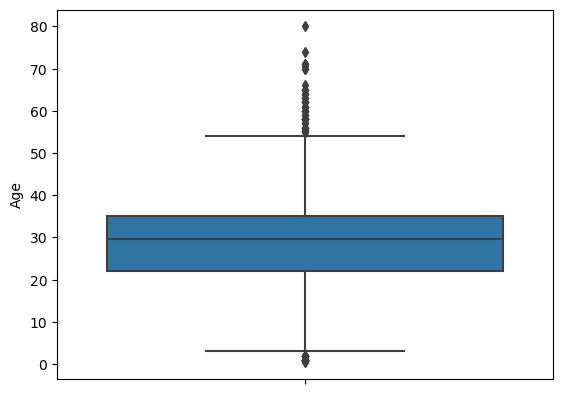

In [198]:
sns.boxplot(y='Age',data=df)

In [200]:
df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [201]:
# Cap the values between 4 and 55 in the Age column

In [203]:
df['Age_Where']=np.where(df.Age>55,55,np.where(df.Age<4,4,df.Age))

In [204]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Where
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,26.000000


In [205]:
df[['Age','Age_Where']].describe()

,Age,Age_Where
count,891.000000,891.000000
mean,29.699118,29.447524
std,13.002015,12.009269
min,0.420000,4.000000
25%,22.000000,22.000000
50%,29.699118,29.699118
75%,35.000000,35.000000
max,80.000000,55.000000


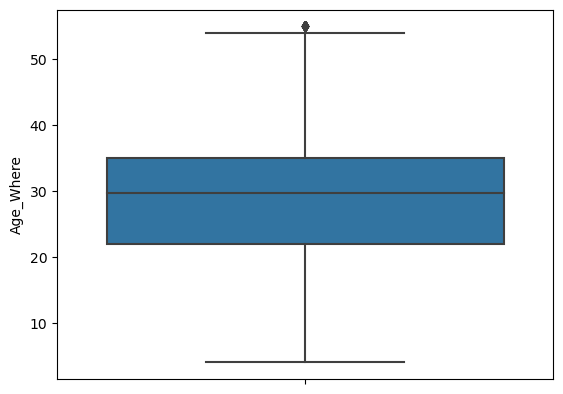

In [207]:
sns.boxplot(y='Age_Where',data=df)
plt.show()

# clip()

In [210]:
# df.col_name.clip(lower,upper,inplace=True)

In [211]:
df['Age_Clip']=df.Age.clip(4,55)

In [212]:
df[['Age','Age_Where','Age_Clip']].describe()

,Age,Age_Where,Age_Clip
count,891.000000,891.000000,891.000000
mean,29.699118,29.447524,29.447524
std,13.002015,12.009269,12.009269
min,0.420000,4.000000,4.000000
25%,22.000000,22.000000,22.000000
50%,29.699118,29.699118,29.699118
75%,35.000000,35.000000,35.000000
max,80.000000,55.000000,55.000000


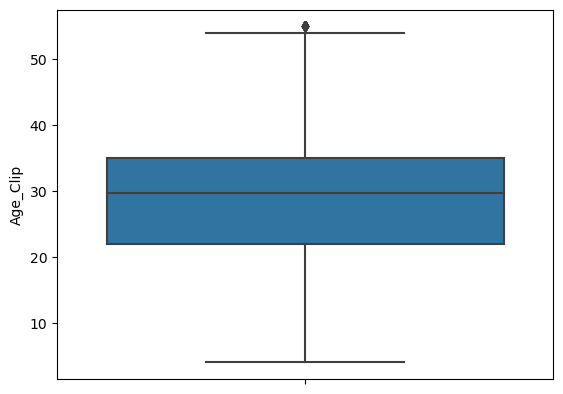

In [215]:
sns.boxplot(y='Age_Clip',data=df)
plt.show()

In [216]:
# I have two dataframes.

# DF1: col1, col2, col3,

# DF2: col2, col4, col5

# How do I concatenate the two dataframes horizontally and have the col1, col2, col3, col4, and col5?


In [220]:
d1=pd.DataFrame({'A':[1,2,3,4,5],'B':[2,4,6,8,10],'C':[1,3,5,7,9]})
d2=pd.DataFrame({'C':[1,3,5,7,9],'D':list('abcde')})

In [221]:
d1

,A,B,C
0,1,2,1
1,2,4,3
2,3,6,5
3,4,8,7
4,5,10,9


In [222]:
d2

,C,D
0,1,a
1,3,b
2,5,c
3,7,d
4,9,e


In [223]:
pd.concat((d1,d2),axis=1)

,A,B,C,C,D
0,1,2,1,1,a
1,2,4,3,3,b
2,3,6,5,5,c
3,4,8,7,7,d
4,5,10,9,9,e


In [224]:
pd.merge(d1,d2)

,A,B,C,D
0,1,2,1,a
1,2,4,3,b
2,3,6,5,c
3,4,8,7,d
4,5,10,9,e
